## 讀取資料

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dropout,Dense

In [1]:
from keras.datasets import mnist
(train_feature,train_label),(test_feature,test_label) = mnist.load_data()

Using TensorFlow backend.


In [2]:
print(train_feature.shape,train_label.shape)

(60000, 28, 28) (60000,)


In [3]:
# 顯示多個資料
def show_images_labels_predictions(images,labels,
                                 predictions,start_id,num=10):
    plt.gcf().set_size_inches(12,14)
    if num>25 :
        num = 25
    for i in range(num):
        # 以subplot方式印出不同資料圖片
        ax = plt.subplot(5,5,i+1)
        ax.imshow(images[start_id], cmap='binary')

        # 有預測結果的資料，在標題顯示結果
        if len(predictions) > 0 :
            title = 'AI = ' + str(predictions[i])
            # 顯示正確或錯誤
            title += '(o)' if predictions[i]==labels[i] else '(x)' 
            title += '\n'+'label = ' + str(labels[i])
        # 沒有預測結果的資料，只在標題顯示真實數值
        else:
            title = 'label = ' + str(labels[i])
        
        # XY軸刻度不顯示
        ax.set_xticks([]);ax.set_yticks([])
        ax.set_title(title,fontsize=12)
        start_id += 1
    plt.show

In [35]:
# 訓練繪圖工具
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    
    plt.legend(['train','validation'],loc='upper left')
    plt.show()

## Preprocessing

In [23]:
# reshape
train_feature_vector = train_feature.reshape(len(train_feature),28,28).astype('float32')
test_feature_vector = test_feature.reshape(len(test_feature),28,28).astype('float32')

print(train_feature_vector.shape)
print(test_feature_vector.shape)

(60000, 28, 28)
(10000, 28, 28)


In [24]:
# normalize feature
train_feature_normalize = train_feature_vector/255
test_feature_normalize = test_feature_vector/255
print("train:",np.min(train_feature_normalize),"~",np.max(train_feature_normalize))
print("test:",np.min(test_feature_normalize),"~",np.max(test_feature_normalize))

train: 0.0 ~ 1.0
test: 0.0 ~ 1.0


In [11]:
# make label One-hot Encoding code
train_label_onehot = np_utils.to_categorical(train_label)
test_label_onehot = np_utils.to_categorical(test_label)

## 建立simple RNN


In [25]:
from keras.layers.recurrent import SimpleRNN

In [26]:
model = Sequential()

In [27]:
INPUT_SIZE = 28 # 每次讀取28個 
TIME_STEPS = 28 # 讀取28次
CELL_SIZE = 256 
model.add(SimpleRNN(
    input_shape = (TIME_STEPS,INPUT_SIZE),
    units = CELL_SIZE,
    unroll = True, # 計算時展開結構
))

In [28]:
model.add(Dropout(0.1))

In [29]:
model.add(Dense(
    units=10,
    kernel_initializer = 'normal',
    activation = 'softmax'
))

In [30]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',metrics=['accuracy'])

In [31]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_2 (SimpleRNN)     (None, 256)               72960     
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 75,530
Trainable params: 75,530
Non-trainable params: 0
_________________________________________________________________


In [32]:
train_history =model.fit(x=train_feature_normalize,
                         y=train_label_onehot,
                         validation_split = 0.2,
                         epochs = 10, batch_size = 200, verbose=2)

W1015 13:26:30.500521  8796 deprecation.py:323] From A:\Anaconda3\envs\tensorflowenv\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 11s - loss: 0.4626 - acc: 0.8637 - val_loss: 0.2161 - val_acc: 0.9357
Epoch 2/10
 - 9s - loss: 0.2139 - acc: 0.9378 - val_loss: 0.1827 - val_acc: 0.9457
Epoch 3/10
 - 10s - loss: 0.1585 - acc: 0.9533 - val_loss: 0.1346 - val_acc: 0.9598
Epoch 4/10
 - 9s - loss: 0.1413 - acc: 0.9591 - val_loss: 0.1047 - val_acc: 0.9700
Epoch 5/10
 - 10s - loss: 0.1179 - acc: 0.9656 - val_loss: 0.1035 - val_acc: 0.9700
Epoch 6/10
 - 8s - loss: 0.1027 - acc: 0.9696 - val_loss: 0.1108 - val_acc: 0.9687
Epoch 7/10
 - 9s - loss: 0.1011 - acc: 0.9699 - val_loss: 0.1097 - val_acc: 0.9673
Epoch 8/10
 - 8s - loss: 0.0979 - acc: 0.9709 - val_loss: 0.1195 - val_acc: 0.9669
Epoch 9/10
 - 9s - loss: 0.0828 - acc: 0.9758 - val_loss: 0.1262 - val_acc: 0.9665
Epoch 10/10
 - 8s - loss: 0.0823 - acc: 0.9759 - val_loss: 0.1053 - val_acc: 0.9714


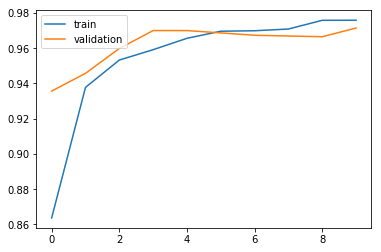

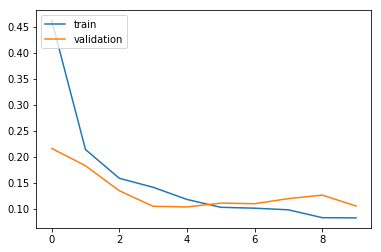

10000/10000 [==============================] - 1s 127us/step

 準確率： 0.9704


In [38]:
show_train_history(train_history,'acc','val_acc')
show_train_history(train_history,'loss','val_loss')
scores = model.evaluate(test_feature_normalize,test_label_onehot)
print('\n 準確率：',scores[1])